In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import os
from IPython.display import Image
import sys, os, glob

from dask.distributed import Client

In [2]:
# Load workers:
client = Client(n_workers=28)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44497 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/44497/status,
Dashboard: /proxy/44497/status,Workers: 28
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46601,Workers: 28
Dashboard: /proxy/44497/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:37063,Total threads: 1
Dashboard: /proxy/46349/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:37919,


# Load and define runs:

In [3]:
base = '/g/data/e14/rmh561/croco/'
base_data = base + 'archive/'
base_analysis = base + '/analysis/'

os.chdir(base_analysis + 'PAC12_75_cpl')
sys.path.append(base_analysis + 'PAC12_75_cpl/Processing_Scripts')
sys.path.append(base_analysis + 'PAC12_75_cpl/Processing_Scripts/Tracer_balance_code_LMaillard_v2')

In [4]:
# Load custom scripts/tools:
import pac12_tools as ptools
import R_tools_fort as ftools

In [5]:
# define runs:
year0 = 2004.
yearE = 2019.
# define runs:
expdict = {
# CROCO-WRF runs:
           'CROCO-WRF Control-E1':{'exp':'PAC12_75_cpl','expn':'exp02','CPL':True,'TSoffset': 2014.,'col':'k','lab':'CROCO-WRF Control Ensemble'}
           ,'CROCO-WRF Control-E2':{'exp':'PAC12_75_cpl','expn':'exp08','CPL':True,'TSoffset': 2014.,'col':'k','lab':''}
           ,'CROCO-WRF Control-E3':{'exp':'PAC12_75_cpl','expn':'exp09','CPL':True,'TSoffset': 2014.,'col':'k','lab':''}
           ,'CROCO-WRF Control-E4':{'exp':'PAC12_75_cpl','expn':'exp10','CPL':True,'TSoffset': 2014.,'col':'k','lab':''}
           ,'CROCO-WRF Control-E5':{'exp':'PAC12_75_cpl','expn':'exp11','CPL':True,'TSoffset': 2014.,'col':'k','lab':''}
           ,'CROCO-WRF NoTFB-E1':{'exp':'PAC12_75_cpl','expn':'exp12','CPL':True,'TSoffset': 2014.,'col':'C0','lab':'CROCO-WRF NoTFB Ensemble'}
           ,'CROCO-WRF NoTFB-E2':{'exp':'PAC12_75_cpl','expn':'exp14','CPL':True,'TSoffset': 2014.,'col':'C0','lab':''}
           ,'CROCO-WRF NoTFB-E3':{'exp':'PAC12_75_cpl','expn':'exp17','CPL':True,'TSoffset': 2014.,'col':'C0','lab':''}
           ,'CROCO-WRF NoTFB-E4':{'exp':'PAC12_75_cpl','expn':'exp20','CPL':True,'TSoffset': 2014.,'col':'C0','lab':''}
           ,'CROCO-WRF NoTFB-E5':{'exp':'PAC12_75_cpl','expn':'exp23','CPL':True,'TSoffset': 2014.,'col':'C0','lab':''}
           ,'CROCO-WRF NoMesoCFB-E1':{'exp':'PAC12_75_cpl','expn':'exp13','CPL':True,'TSoffset': 2014.,'col':'C1','lab':'CROCO-WRF NoMesoCFB Ensemble'}
           ,'CROCO-WRF NoMesoCFB-E2':{'exp':'PAC12_75_cpl','expn':'exp15','CPL':True,'TSoffset': 2014.,'col':'C1','lab':''}
           ,'CROCO-WRF NoMesoCFB-E3':{'exp':'PAC12_75_cpl','expn':'exp18','CPL':True,'TSoffset': 2014.,'col':'C1','lab':''}
           ,'CROCO-WRF NoMesoCFB-E4':{'exp':'PAC12_75_cpl','expn':'exp21','CPL':True,'TSoffset': 2014.,'col':'C1','lab':''}
           ,'CROCO-WRF NoMesoCFB-E5':{'exp':'PAC12_75_cpl','expn':'exp24','CPL':True,'TSoffset': 2014.,'col':'C1','lab':''}
           ,'CROCO-WRF NoCFB-E1':{'exp':'PAC12_75_cpl','expn':'exp26','CPL':True,'TSoffset': 2014.,'col':'C2','lab':'CROCO-WRF NoCFB Ensemble'}
           ,'CROCO-WRF NoCFB-E2':{'exp':'PAC12_75_cpl','expn':'exp27','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           ,'CROCO-WRF NoCFB-E3':{'exp':'PAC12_75_cpl','expn':'exp28','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           ,'CROCO-WRF NoCFB-E4':{'exp':'PAC12_75_cpl','expn':'exp29','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           ,'CROCO-WRF NoCFB-E5':{'exp':'PAC12_75_cpl','expn':'exp30','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           # ,'CROCO-WRF NoCFB-E1':{'exp':'PAC12_75_cpl','expn':'exp06','CPL':True,'TSoffset': 2014.,'col':'C2','lab':'CROCO-WRF NoCFB Ensemble'}
           # ,'CROCO-WRF NoCFB-E2':{'exp':'PAC12_75_cpl','expn':'exp16','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           # ,'CROCO-WRF NoCFB-E3':{'exp':'PAC12_75_cpl','expn':'exp19','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           # ,'CROCO-WRF NoCFB-E4':{'exp':'PAC12_75_cpl','expn':'exp22','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
           # ,'CROCO-WRF NoCFB-E5':{'exp':'PAC12_75_cpl','expn':'exp25','CPL':True,'TSoffset': 2014.,'col':'C2','lab':''}
#           ,'CROCO-WRF PP81':{'exp':'PAC12_75_cpl','expn':'exp05','CPL':True,'TSoffset': 2014.,'col':'C3','lab':'CROCO-WRF PP81'}
# CROCO-only runs:
           ,'CROCO Control':{'exp':'PAC12_75','expn':'exp11','CPL':False,'TSoffset': 2014.,'col':'0.65','lab':'CROCO Control'}
#          ,'CROCO PP81':{'exp':'PAC12_75','expn':'exp12','CPL': False,'TSoffset': 2014.}
          }
cont = 'CROCO-WRF Control-E1'
for nam in expdict.keys():
    expdict[nam]['sfile'] = base_analysis + expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_scalarvars.txt'

# Load scalar data:

In [6]:
# Load scalar data from log files:
sdata = {}
stime = {}
for nam in expdict.keys():
    sdata[nam] = pd.read_csv(expdict[nam]['sfile'],header=None,delim_whitespace=True)
    stime[nam] = sdata[nam][0]/(86400./300.*365.)+year0

# Process global monthly T and S:

In [ ]:
# Load monthly global temperature data for temp and salt plots:
#
# ncrcat -v temp,salt PAC12_75_expXX/20*/croco_out_mon.nc croco_1m_aver_expXX_temp_salt.nc
nams = ['CROCO-WRF NoCFBr-E3','CROCO-WRF NoCFBr-E4','CROCO-WRF NoCFBr-E5']
#nams = ['CROCO-WRF Smooth-SST-E%01d' % (x+1) for x in range(5)] + ['CROCO-WRF NoCFB-E%01d' % (x+1) for x in range(5)] + ['CROCO-WRF NoMesoCFB-E%01d' % (x+1) for x in range(5)]
for nam in nams:
    TSdata = xr.open_dataset(base_data+expdict[nam]['exp'] + '/croco_1m_aver_' + expdict[nam]['expn'] + '_temp_salt.nc',chunks={'time_counter': 1, 's_rho': 1})
    globalT_tmp = TSdata.temp.mean('x_rho').mean('y_rho').mean('s_rho')
    globalS_tmp = TSdata.salt.mean('x_rho').mean('y_rho').mean('s_rho')

    # Split calculation into single time-step chunks:
    globalT = xr.zeros_like(globalT_tmp)
    globalS = xr.zeros_like(globalS_tmp)
    tL = len(globalT_tmp.time_counter)
    for ii in range(tL):
        print('Doing time step ' + str(ii+1) + ' of ' + str(tL) + ' Run ' + nam)
        globalT[ii] = globalT_tmp.isel(time_counter=ii).load()
        globalS[ii] = globalS_tmp.isel(time_counter=ii).load()
    Tglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_globalT.nc'
    Sglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_globalS.nc'
    globalT.to_netcdf(Tglob)
    globalS.to_netcdf(Sglob)

# Process Monthly Nino 3.4:

In [ ]:
# Load Nino 3.4 index:
#nam = 'CROCO-WRF Control-E2'
for nam in nams:
    TSdata = xr.open_dataset(base_data+expdict[nam]['exp'] + '/croco_1m_aver_' + expdict[nam]['expn'] + '_temp_salt.nc',chunks={'time_counter': 1, 's_rho': 1})
    TSdata["x_rho"] = TSdata.nav_lon_rho.isel(y_rho=0)
    TSdata["y_rho"] = TSdata.nav_lat_rho.isel(x_rho=0)
    N34_tmp = TSdata.temp.isel(s_rho=-1).sel(x_rho=slice(-170.+360.,-120.+360.)).sel(y_rho=slice(-5.,5.)).mean('x_rho').mean('y_rho')

    # Split calculation into single time-step chunks:
    N34 = xr.zeros_like(N34_tmp)
    tL = len(N34_tmp.time_counter)
    for ii in range(tL):
        print('Doing N34 time step ' + str(ii+1) + ' of ' + str(tL) + ' Run ' + nam)
        N34[ii] = N34_tmp.isel(time_counter=ii).load()
    Tglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_N34.nc'
    N34.to_netcdf(Tglob)

In [9]:
# Load satellite N34:
OISST = xr.open_mfdataset('/g/data/ua8/NOAA_OISST/AVHRR/v2-1_modified/*_201*.nc',concat_dim="time", combine="nested",
                  data_vars='minimal', coords='minimal', compat='override',parallel=True).isel(zlev=0)

OISST_N34 = OISST.sst.sel(lon=slice(-170.+360.,-120.+360.)).sel(lat=slice(-5.,5.)).mean('lon').mean('lat')
OISST_N34 = OISST_N34.sel(time=slice('2014-01-01','2018-12-31'))

mavg=True
if (mavg):
    OISST_N34 = OISST_N34.resample(time="1M").mean()
    OISST_N34_2014_time = 2014.+np.arange(0.,len(OISST_N34.time))/12.
else: 
    OISST_N34_2014_time = 2014.+np.arange(0.,len(OISST_N34.time))/365.

OISST_N34.load();

# Process Daily SST, Wind-work and KE-based TIW metrics:

In [7]:
# Define regions:
TIW_TVreg = 200., 260., -5., 8. # SST region variance
TIW_EKEreg = 200., 260., -5., 8. # EKE region variance
filt_width = 6.

In [10]:
# OISST TIW-TV calculation:
sst = OISST.sst.sel(time=slice('2014-01-01','2018-12-31')).sel(lon=slice(TIW_TVreg[0]-filt_width*2.,TIW_TVreg[1]+filt_width*2.)).sel(lat=slice(TIW_TVreg[2],TIW_TVreg[3])).rename({'lon':'x_rho','lat':'y_rho'}) 
sst_hp = sst - ptools.zlp_filt(sst,filt_width)
sst_hp = sst_hp.sel(x_rho=slice(TIW_TVreg[0],TIW_TVreg[1]))
OBS_SSTv = (sst_hp**2.).mean('x_rho').mean('y_rho').resample(time="M").mean().load()

In [102]:
# Load pre-processed model SST and EKE variance:
SSTv = {}
EKE = {}
for nam in expdict.keys():
    print(nam)
    exp = expdict[nam]['exp']
    expn = expdict[nam]['expn']
    files = sorted(glob.glob(base_data + exp + '/' + exp + '_' + expn + '/*/croco_out_mon_hp.nc'))
    try:
        data = xr.open_mfdataset(files, concat_dim="time_counter", combine="nested",data_vars='minimal', coords='minimal', compat='override',parallel=True,chunks={'time_counter':1}).rename({'time_counter':'time'})
        data = ptools.create_coords_CROCO(data)
    
        SSTv[nam] = data.SST_hp_var.sel(x_rho=slice(TIW_TVreg[0],TIW_TVreg[1])).sel(y_rho=slice(TIW_TVreg[2],TIW_TVreg[3])).mean('x_rho').mean('y_rho').load()
        Uv = data.U_hp_var.sel(x_u=slice(TIW_TVreg[0],TIW_TVreg[1])).sel(y_u=slice(TIW_TVreg[2],TIW_TVreg[3])).mean('x_u').mean('y_u').load()
        Vv = data.V_hp_var.sel(x_v=slice(TIW_TVreg[0],TIW_TVreg[1])).sel(y_v=slice(TIW_TVreg[2],TIW_TVreg[3])).mean('x_v').mean('y_v').load()
        EKE[nam] = Uv + Vv
        
    except:
        print('No mon_hp data for ' + nam)

CROCO-WRF Control-E1
CROCO-WRF Control-E2
CROCO-WRF Control-E3
CROCO-WRF Control-E4
CROCO-WRF Control-E5
CROCO-WRF NoTFB-E1
CROCO-WRF NoTFB-E2
CROCO-WRF NoTFB-E3
CROCO-WRF NoTFB-E4
CROCO-WRF NoTFB-E5
CROCO-WRF NoMesoCFB-E1
CROCO-WRF NoMesoCFB-E2
CROCO-WRF NoMesoCFB-E3
CROCO-WRF NoMesoCFB-E4
CROCO-WRF NoMesoCFB-E5
CROCO-WRF NoCFB-E1
CROCO-WRF NoCFB-E2
CROCO-WRF NoCFB-E3
CROCO-WRF NoCFB-E4
CROCO-WRF NoCFB-E5
CROCO Control


# Load and plot processed data:

In [12]:
vnames = ['globalT','globalS','N34','TIWKE_U','TIWKE_V','WW','TIWTV']
TS = {}

for nam in expdict.keys():
    TS[nam] = {}
    print(nam)
    for var in vnames:
        name = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_' + var + '.nc'

        if (os.path.exists(name)):
            TS[nam][var] = xr.open_dataset(name)    
            tL = len(TS[nam][var].time_counter)
        else:
            print('Variable ' + var + ' not found for run ' + nam + ' - run processing step first?')

CROCO-WRF Control-E1
CROCO-WRF Control-E2
Variable TIWKE_U not found for run CROCO-WRF Control-E2 - run processing step first?
Variable TIWKE_V not found for run CROCO-WRF Control-E2 - run processing step first?
Variable WW not found for run CROCO-WRF Control-E2 - run processing step first?
Variable TIWTV not found for run CROCO-WRF Control-E2 - run processing step first?
CROCO-WRF Control-E3
Variable TIWKE_U not found for run CROCO-WRF Control-E3 - run processing step first?
Variable TIWKE_V not found for run CROCO-WRF Control-E3 - run processing step first?
Variable WW not found for run CROCO-WRF Control-E3 - run processing step first?
Variable TIWTV not found for run CROCO-WRF Control-E3 - run processing step first?
CROCO-WRF Control-E4
Variable TIWKE_U not found for run CROCO-WRF Control-E4 - run processing step first?
Variable TIWKE_V not found for run CROCO-WRF Control-E4 - run processing step first?
Variable WW not found for run CROCO-WRF Control-E4 - run processing step first?


(2004.0, 2019.0)

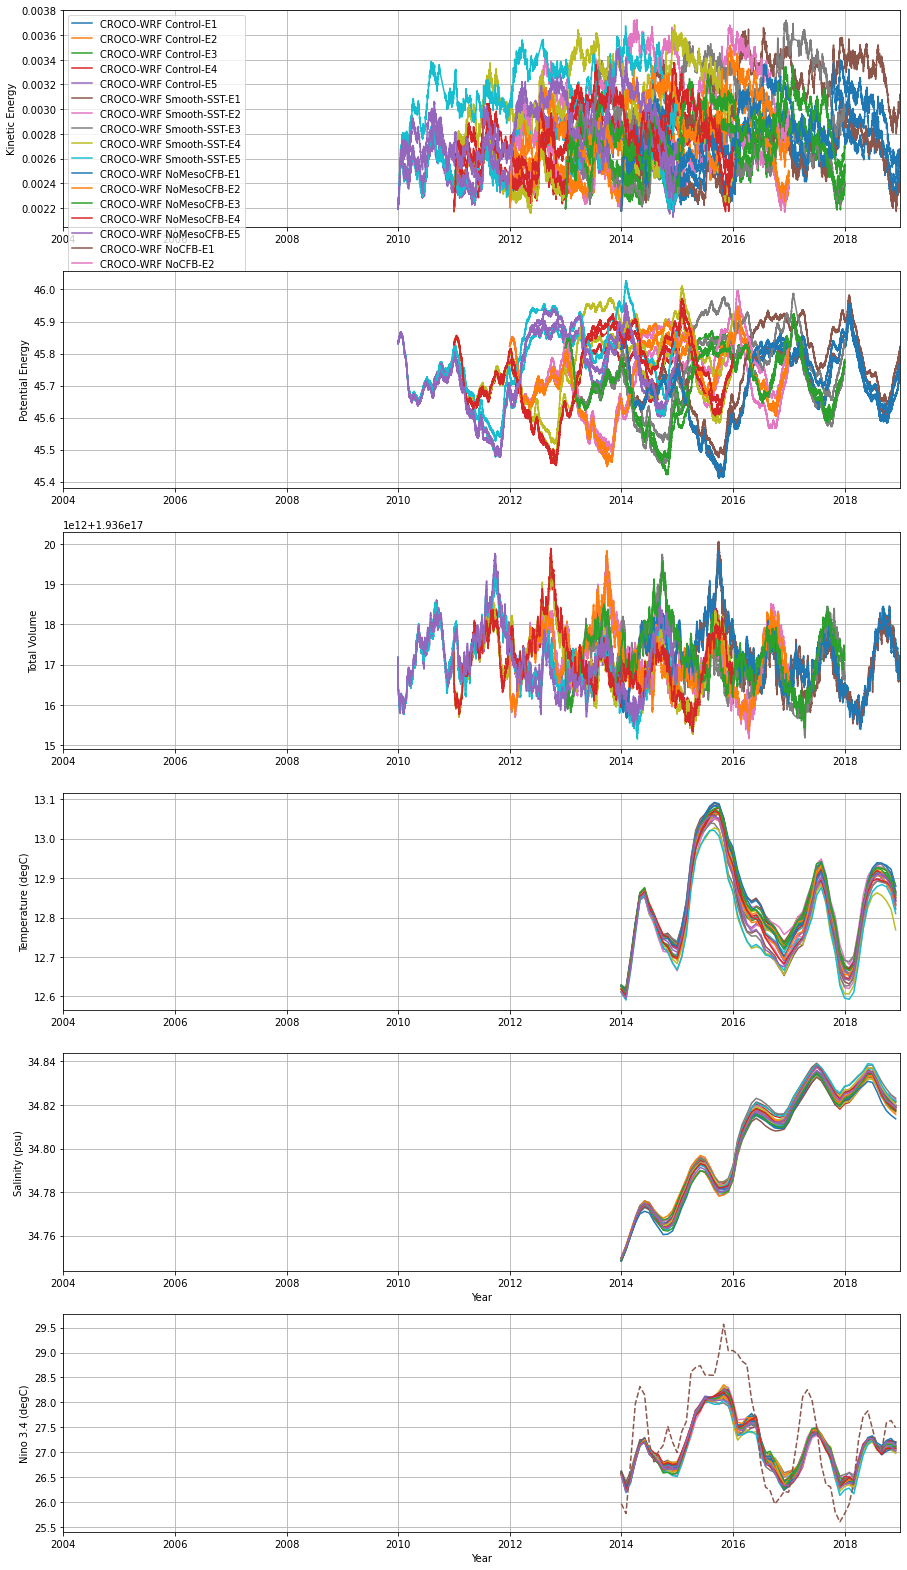

In [12]:
plt.figure(figsize=(15,28))
year0 = 2004.

keys = expdict.keys()
#keys = ['CROCO-WRF Control-E1','CROCO-WRF Smooth-SST-E1','CROCO-WRF Smooth-SST-E2','CROCO-WRF Smooth-SST-E3','CROCO-WRF Smooth-SST-E4','CROCO-WRF Smooth-SST-E5']
#keys = ['CROCO-WRF Control-E1','CROCO-WRF Control-E2','CROCO-WRF NoCFB','CROCO-WRF Smooth-SST','CROCO-WRF NoMesoCFB']
#keys = ['CROCO-WRF Control-E1','CROCO-WRF NoCFB-E1','CROCO-WRF NoCFB-E2','CROCO-WRF NoCFB-E3','CROCO-WRF NoCFB-E4','CROCO-WRF NoCFB-E5','CROCO-WRF NoCFBr-E1']
#plt.figure(figsize=(8,28))
#year0 = 2014.

#plt.subplot(6,1,1)
#for name in expdict.keys():
#    plt.plot(stime[name].values,sdata[name][0],label=name)
#plt.ylabel('Time Step')
#plt.grid()
plt.subplot(6,1,1)
for name in keys:
    plt.plot(stime[name],sdata[name][2],label=name)
plt.ylabel('Kinetic Energy')
plt.grid()
plt.xlim([year0,yearE])
plt.legend()

plt.subplot(6,1,2)
for name in keys:
    plt.plot(stime[name],sdata[name][3],label=name)
plt.ylabel('Potential Energy')
plt.grid()
plt.xlim([year0,yearE])
plt.subplot(6,1,3)
for name in keys:
    plt.plot(stime[name],sdata[name][5],label=name)
plt.ylabel('Total Volume')
plt.grid()
plt.xlim([year0,yearE])

plt.subplot(6,1,4)
for name in keys:
    tL = len(TS[name]['globalT'].temp)
    TStime = [x/12.+expdict[name]['TSoffset'] for x in range(tL)]
    plt.plot(TStime,TS[name]['globalT'].temp)
plt.ylabel('Temperature (degC)')
plt.grid()
plt.xlim([year0,yearE])

plt.subplot(6,1,5)
for name in keys:
    tL = len(TS[name]['globalS'].salt)
    TStime = [x/12.+expdict[name]['TSoffset'] for x in range(tL)]
    plt.plot(TStime,TS[name]['globalS'].salt,label=name)
plt.ylabel('Salinity (psu)')
plt.xlabel('Year')
plt.grid()
plt.xlim([year0,yearE])

plt.subplot(6,1,6)
for name in keys:
    tL = len(TS[name]['N34'].temp)
    TStime = [x/12.+expdict[name]['TSoffset'] for x in range(tL)]
    plt.plot(TStime,TS[name]['N34'].temp,label=name)
plt.plot(OISST_N34_2014_time,OISST_N34.values,linestyle='dashed',label='OISST Obs.')
#plt.plot(OISST_N34.time,OISST_N34.values,linestyle='dashed',label='OISST Obs.')
plt.ylabel('Nino 3.4 (degC)')
plt.xlabel('Year')
plt.grid()
plt.xlim([year0,yearE])

#plt.savefig('Global_Variables_CFB.png',dpi=150)

Text(0.5, 1.0, '')

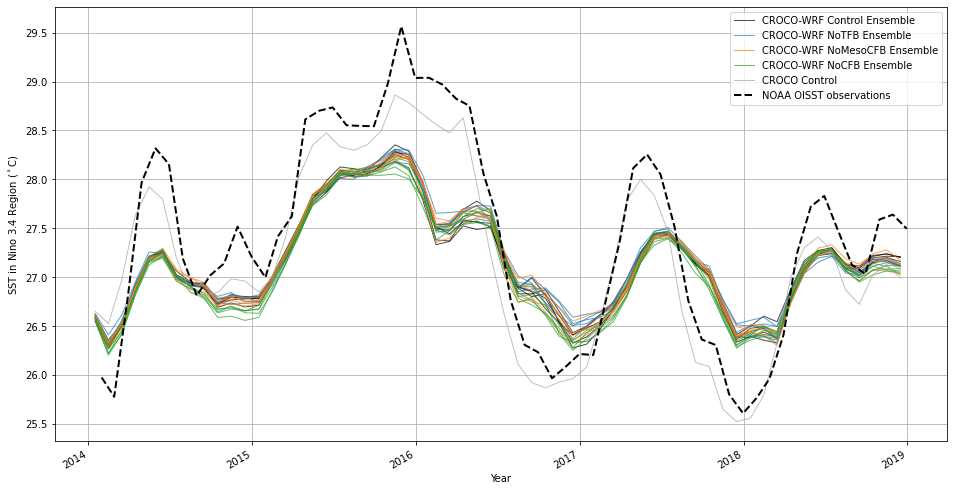

In [15]:
# Nino 3.4 (raw):
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(16,8),facecolor='w')

keys = list(expdict.keys())
#keys.remove('CROCO Control')
#keys = ['CROCO-WRF Control-E1','CROCO-WRF Smooth-SST-E1','CROCO-WRF Smooth-SST-E2','CROCO-WRF Smooth-SST-E3','CROCO-WRF Smooth-SST-E4','CROCO-WRF Smooth-SST-E5']
#keys = ['CROCO Control', 'CROCO-WRF Control-E1','CROCO-WRF Control-E2','CROCO-WRF Control-E3','CROCO-WRF Control-E4','CROCO-WRF Control-E5',
#       'CROCO-WRF Smooth-SST','CROCO-WRF NoCFB','CROCO-WRF NoMesoCFB',
#       ]
#cols = ['k','0.65','0.65','0.65','0.65','0.65',
#        'C0','C1','C2']
#labels = ['CROCO Control','CROCO-WRF Control Ensemble','','','','',
#          'CROCO-WRF Smooth-SST','CROCO-WRF No CFB','CROCO-WRF No Mesoscale CFB']
#keys = ['CROCO-WRF Control-E1','CROCO-WRF NoCFB-E1','CROCO-WRF NoCFB-E2','CROCO-WRF NoCFB-E3','CROCO-WRF NoCFB-E4','CROCO-WRF NoCFB-E5','CROCO-WRF NoCFBr-E1']

for i,name in enumerate(keys):
    label = expdict[name]['lab']
    col = expdict[name]['col']
    if len(label)>1:
        TS[name]['N34'].temp.plot(ax=axes,linewidth=1.,label=label,color=col,alpha=0.7)
    else:
        TS[name]['N34'].temp.plot(ax=axes,linewidth=1.,color=col,alpha=0.7)
        
axes.grid()
OISST_N34.plot(ax=axes,linewidth=2.,linestyle='dashed',label='NOAA OISST observations',color='k')
axes.set_xlabel('Year')
axes.set_ylabel('SST in Nino 3.4 Region ($^\circ$C)')
axes.legend()
axes.set_title('')

#plt.savefig('Nino34_CROCO-WRF_only.png',dpi=150)

In [103]:
# Calculate ensembles:
N34 = {}
for name in expdict.keys():
    N34[name] = TS[name]['N34'].temp
    
lst = [N34,SSTv,EKE]
runs = ['CROCO-WRF Control','CROCO-WRF NoTFB','CROCO-WRF NoMesoCFB','CROCO-WRF NoCFB']
eL = 5
zScore = 1.96
for obj in lst:
    for run in runs:
        obj[run] = obj[run + '-E1'].copy()
        obj[run + '-s'] = xr.zeros_like(obj['CROCO-WRF Control-E1'])
        for ei in range(eL-1):
            obj[run] += obj[run + '-E%01d' % (ei+2)]
        obj[run] = obj[run]/eL
        for ei in range(eL):
            obj[run + '-s'] += (obj[run + '-E%01d' % (ei+1)]-obj[run])**2.
        obj[run + '-s'] = np.sqrt(obj[run + '-s']/eL)/np.sqrt(eL)
cont = 'CROCO-WRF Control'

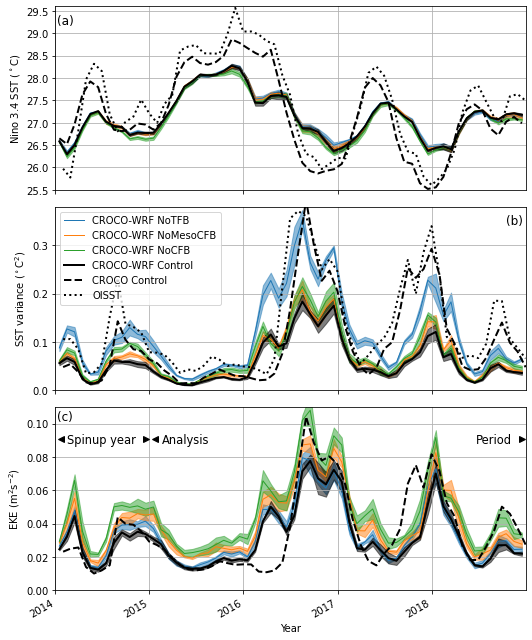

In [108]:
# Nino 3.4, SSTv and EKE:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(7.5,9),facecolor='w')

keys = list(expdict.keys())
keys = ['CROCO-WRF NoTFB','CROCO-WRF NoMesoCFB','CROCO-WRF NoCFB','CROCO-WRF Control','CROCO Control']
cols = ['C0','C1','C2','k','k']
stys = ['-','-','-','-','dashed']
wids = [1,1,1,2,2]
for i,name in enumerate(keys):
    label = name
    col = cols[i]
    sty = stys[i]
    wid = wids[i]
    N34[name].plot(ax=axes[0],linewidth=wid,color=col,linestyle=sty)
    SSTv[name].plot(ax=axes[1],linewidth=wid,label=label,color=col,linestyle=sty)
    EKE[name].plot(ax=axes[2],linewidth=wid,color=col,linestyle=sty)
    
    # Add ensemble ranges:
    try:
        axes[0].fill_between(N34[name].time_counter,-zScore*N34[name + '-s']+N34[name],zScore*N34[name + '-s']+N34[name],color=col,alpha=0.5)
        axes[1].fill_between(SSTv[name].time,-zScore*SSTv[name + '-s']+SSTv[name],zScore*SSTv[name + '-s']+SSTv[name],color=col,alpha=0.5)
        axes[2].fill_between(EKE[name].time,-zScore*EKE[name + '-s']+EKE[name],zScore*EKE[name + '-s']+EKE[name],color=col,alpha=0.5)
    except:
        pass
    
OISST_N34.plot(ax=axes[0],linewidth=2.,linestyle='dotted',color='k')
OBS_SSTv.plot(ax=axes[1],linewidth=2.,linestyle='dotted',label='OISST',color='k')

for ax in axes:
    ax.grid()
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xlim([pd.to_datetime('2014-01-01'),pd.to_datetime('2018-12-31')])
    ax.set_xticks(pd.to_datetime(['2014','2015','2016','2017','2018']))
    ax.set_xticklabels('')
axes[2].set_xticklabels(['2014','2015','2016','2017','2018'])
axes[2].set_xlabel('Year')
axes[0].set_ylabel('Nino 3.4 SST ($^\circ$C)')
axes[1].set_ylabel('SST variance ($^\circ$C$^2$)')
axes[2].set_ylabel('EKE (m$^2$s$^{-2}$)')
axes[1].legend(loc='upper left')
axes[1].set_yticks([0.,0.1,0.2,0.3])
axes[0].set_ylim([25.5,29.6])
axes[1].set_ylim([0.,0.38])
axes[2].set_ylim([0.,0.11])
axes[0].text(pd.to_datetime('2014-01-08'),29.2,'(a)',fontsize=12)
axes[1].text(pd.to_datetime('2018-10-15'),0.343,'(b)',fontsize=12)
axes[2].text(pd.to_datetime('2014-01-08'),0.102,'(c)',fontsize=12)
#axes[2].annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#            arrowprops=dict(arrowstyle="<->"))
#axes[2].arrow(pd.to_datetime('2014-01-05'),0.09,pd.Timedelta(0.32, "d"),0.)
axes[2].text(pd.to_datetime('2014-02-14'),0.088,'Spinup year',fontsize=11.5)
axes[2].plot(pd.to_datetime('2014-01-21'),0.091,'<k')
axes[2].plot(pd.to_datetime('2014-12-18'),0.091,'>k')
axes[2].text(pd.to_datetime('2015-02-20'),0.088,'Analysis',fontsize=11.5)
axes[2].plot(pd.to_datetime('2015-01-21'),0.091,'<k')
axes[2].plot(pd.to_datetime('2018-12-18'),0.091,'>k')
axes[2].text(pd.to_datetime('2018-06-20'),0.088,'Period',fontsize=11.5)
plt.tight_layout()

plt.savefig('TimeSeries.png',dpi=150)

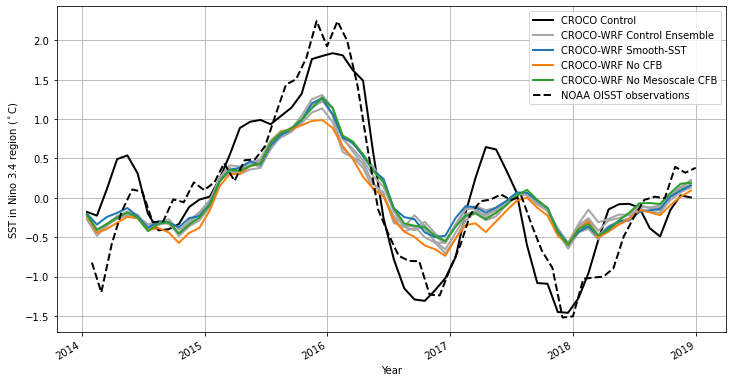

In [29]:
# Nino 3.4 (deseasoned):
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,6),facecolor='w')

climatology = (TS['CROCO-WRF Control-E1']['N34'].temp.groupby("time_counter.month").mean()+
               TS['CROCO-WRF Control-E2']['N34'].temp.groupby("time_counter.month").mean()+
               TS['CROCO-WRF Control-E3']['N34'].temp.groupby("time_counter.month").mean()+
               TS['CROCO-WRF Control-E4']['N34'].temp.groupby("time_counter.month").mean()+
               TS['CROCO-WRF Control-E5']['N34'].temp.groupby("time_counter.month").mean())/5.

for i,name in enumerate(keys):
    if len(labels[i])>1:
        (TS[name]['N34'].temp.groupby('time_counter.month')-climatology).plot(ax=axes,linewidth=2.,label=labels[i],color=cols[i])
    else:
        (TS[name]['N34'].temp.groupby('time_counter.month')-climatology).plot(ax=axes,linewidth=2.,color=cols[i])
axes.grid()
climatology = OISST_N34.groupby("time.month").mean()
(OISST_N34.groupby("time.month")-climatology).plot(ax=axes,linewidth=2.,linestyle='dashed',label='NOAA OISST observations',color='k')
axes.set_xlabel('Year')
axes.set_ylabel('SST in Nino 3.4 region ($^\circ$C)')
axes.legend()
axes.set_title('')

plt.savefig('Nino34_deseasoned.png',dpi=150)

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=1,figsize=(15,28))

varbs = ['N34','globalT','globalS','WW','TIWTV','TIWKE_U','TIWKE_V']
keys = ['CROCO-WRF Control','CROCO-WRF Smooth-SST','CROCO-WRF NoCFB','CROCO-WRF NoMesoCFB']

for i,v in enumerate(varbs):
    for name in keys:
        varname = list(TS[name][v].keys())[0]
        TS[name][v][varname].resample(time_counter="1MS").mean(dim="time_counter").plot(ax=axes[i],linewidth=3.,label=name)#.resample(time_counter="1MS").mean(dim="time_counter")
    axes[i].set_ylabel(v)
    axes[i].grid()
#OISST_N34.plot(ax=axes[0],linewidth=2.,linestyle='dashed',label='OISST Obs.')
axes[-1].set_xlabel('Year')
axes[-1].legend()

#plt.savefig('TIW_Variance_WW_CROCO-WRF_TimeSeries.png',dpi=150)

In [ ]:
# Check on deseasoning:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
keys = ['CROCO Control','CROCO-WRF Control']
cols = ['C0','C1']
for i, name in enumerate(keys):
    print(name)
    raw = TS[name]['N34'].temp-TS[name]['N34'].temp.mean('time_counter')
    climatology = raw.groupby("time_counter.month").mean()
    desea = raw.groupby('time_counter.month')-climatology
    
    raw.plot(ax=axes[1],label=name + ' raw',color=cols[i])
    climatology.plot(ax=axes[0],label=name + ' climatology',color=cols[i])
    desea.plot(ax=axes[1],label=name + ' deseasoned',color=cols[i],linestyle='dashed')
    (raw-desea).plot(ax=axes[2],label=name + ' raw - deseasoned',color=cols[i],linestyle='dashed')
axes[0].legend()
axes[0].set_title('Climatology (2014-2018)')
axes[0].set_ylabel('Nino 3.4')
axes[1].legend()
axes[1].set_title('Raw and Deseasoned')
axes[2].legend()
axes[2].set_title('Raw - deseasoned')

plt.savefig('Deseasoning_Check.png',dpi=100)

In [ ]:
# OLD without pre-processing
#
# ncrcat -v nav_lat,nav_lon,SST,UOCE,VOCE,TAUX,TAUY PAC12_75_cpl_exp03/201*/wrf3d_1D_*.nc wrf_1d_aver_exp03_surfvars.nc
nam = 'CROCO-WRF NoMesoCFB'
SFdata = xr.open_dataset(base_data+expdict[nam]['exp'] + '/wrf_1d_aver_' + expdict[nam]['expn'] + '_surfvars.nc',chunks={'time_counter': 1})

lon = SFdata.nav_lon.isel(y=0)
lon = np.where(np.less(lon,0.).values,lon+360.,lon)
lat = SFdata.nav_lat.isel(x=0).values
SFdata["x"] = lon
SFdata["y"] = lat
DX = (SFdata.nav_lon[0,1]-SFdata.nav_lon[0,0]).values
DY = (SFdata.nav_lat[1,0]-SFdata.nav_lat[0,0]).values
Re = 6371000.0
lt,ln = xr.broadcast(SFdata.x,SFdata.y)
SFdata['area'] = (DY*np.pi/180.*Re)*(DX*np.pi/180.*Re)*np.cos(lt/180.*np.pi)

yreg = [-5.,8.]
SFdata = SFdata.sel(y=slice(yreg[0],yreg[1]))

ln_hp_filt = 12.0
xreg = [180.,260.]

rho0 = 1035.

# Wind-work:
WW_tmp = (SFdata.UOCE.sel(x=slice(xreg[0],xreg[1]))*SFdata.TAUX.sel(x=slice(xreg[0],xreg[1]))+
         SFdata.VOCE.sel(x=slice(xreg[0],xreg[1]))*SFdata.TAUY.sel(x=slice(xreg[0],xreg[1])))*SFdata.area
WW_tmp = WW_tmp.sum('x').sum('y')

# TIWKE:
VOCE = SFdata.VOCE.sel(x=slice(xreg[0]-ln_hp_filt,xreg[1]+ln_hp_filt))
TIWKE_V_tmp = (VOCE-VOCE.rolling(x=int(ln_hp_filt/DX),center=True).mean())**2.*SFdata.area
TIWKE_V_tmp = 0.5*rho0*TIWKE_V_tmp.sel(x=slice(xreg[0],xreg[1])).sum('x').sum('y')

UOCE = SFdata.UOCE.sel(x=slice(xreg[0]-ln_hp_filt,xreg[1]+ln_hp_filt))
TIWKE_U_tmp = (UOCE-UOCE.rolling(x=int(ln_hp_filt/DX),center=True).mean())**2.*SFdata.area
TIWKE_U_tmp = 0.5*rho0*TIWKE_U_tmp.sel(x=slice(xreg[0],xreg[1])).sum('x').sum('y')

# TIWTV:
SST = SFdata.SST.sel(x=slice(xreg[0]-ln_hp_filt,xreg[1]+ln_hp_filt))
TIWTV_tmp = (SST-SST.rolling(x=int(ln_hp_filt/DX),center=True).mean())**2.*SFdata.area
TIWTV_tmp = TIWTV_tmp.sel(x=slice(xreg[0],xreg[1])).sum('x').sum('y')

# Split calculation into single time-step chunks:
WW = xr.zeros_like(WW_tmp)
TIWKE_U = xr.zeros_like(TIWKE_U_tmp)
TIWKE_V = xr.zeros_like(TIWKE_V_tmp)
TIWTV = xr.zeros_like(TIWTV_tmp)
tL = len(WW_tmp.time_counter)
for ii in range(tL):
    print('Doing time step ' + str(ii+1) + ' of ' + str(tL) + ' Run ' + nam)
    WW[ii] = WW_tmp.isel(time_counter=ii).load()
    TIWKE_U[ii] = TIWKE_U_tmp.isel(time_counter=ii).load()
    TIWKE_V[ii] = TIWKE_V_tmp.isel(time_counter=ii).load()
    TIWTV[ii] = TIWTV_tmp.isel(time_counter=ii).load()
WWglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_WW.nc'
TIWKE_Uglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_TIWKE_U.nc'
TIWKE_Vglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_TIWKE_V.nc'
TIWTVglob = base_data+expdict[nam]['exp'] + '/' + expdict[nam]['exp'] + '_' + expdict[nam]['expn'] + '_TIWTV.nc'
WW.to_netcdf(WWglob)
TIWKE_U.to_netcdf(TIWKE_Uglob)
TIWKE_V.to_netcdf(TIWKE_Vglob)
TIWTV.to_netcdf(TIWTVglob)

In [ ]:
WW.to_netcdf(WWglob)
TIWKE_U.to_netcdf(TIWKE_Uglob)
TIWKE_V.to_netcdf(TIWKE_Vglob)
TIWTV.to_netcdf(TIWTVglob)

![title](spinup_evolution_for_coupled_simu.png)